# DSC 530 Final - Can hallucinogens have a positive impact on mental health?

## DO MORE NOTIFICATIONS CAUSE US TO OPEN APPS MORE?

### Author: Alex Hamedaninia

DESCRIPTION

https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time?sort=published

notes:
- make sure data is not categorical. 'how does this make u feel 1-10' is stepping the line. but something that MEASURES is what we need.
- people lost most points in first 4 points.

-can get mean/mode/spread/tail can use directly from df. thats fine
- create overlapping scenarios (did in week 3/4)
- dont give histogram for analytical distribution - go to that chapte
- regression library: ols library

- all points are a checklist to check off. keep clean but no need to dazzle. 

-turn in code. upload as ipynb.

- paper in pdf? word? no formatting necessary

- if dataset is too large (like 500,000) just link it.

In [38]:
import pandas as pd
import numpy as np
!pip install xlrd
df1 = pd.read_excel('Predict_student_ knowledge_level.xls')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00


In [39]:
df1.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


We will be taking a look at each of these variables:
* STG - the degree of study time
* SCG - the degree of repitition number of user
* STR - degree of study time for related materials
* LPR - exam performance for related materials
* PEG - exam performance
* UNS - knowledge level of user (very low, low, middle, high)

Let's take a look at how each of these variables look on a histogram. Let's import the thinkplot module to make this a little bit easier. 

We will also rename some of these variables to make them more intuitive.

In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [5]:
import thinkstats2
import thinkplot

Let's rename the variables now.

In [58]:
new_col_name = {'STG': 'study', 
                'SCG': 'repetition', 
                'STR': 'study_other', 
                'LPR': 'exam_other', 
                'PEG': 'exam', 
                ' UNS': 'knowledge_lvl', } 
df1.rename(columns=new_col_name, inplace=True)

Now we can produce histograms for each of these variables to see how the distribution looks and to determine if there are any outliers present

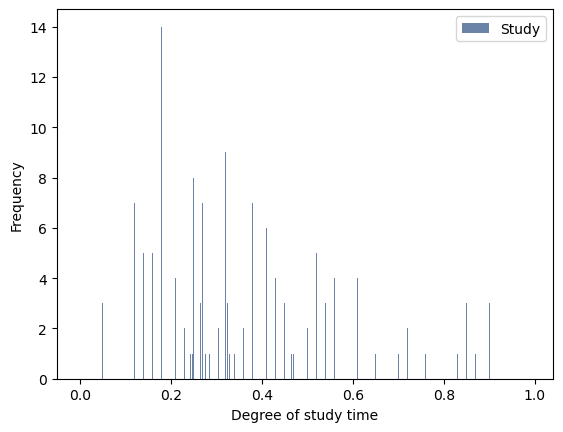

<Figure size 800x600 with 0 Axes>

In [45]:
hist = thinkstats2.Hist(df1.study, label = 'Study')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Degree of study time', ylabel = 'Frequency')

We have a normal distribution here that is slightly skewed to the left. No visible outliers. 

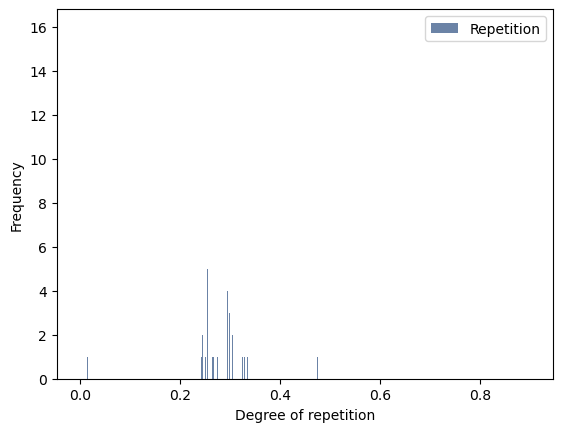

<Figure size 800x600 with 0 Axes>

In [48]:
hist = thinkstats2.Hist(df1.repitition, label = 'Repetition')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Degree of repetition', ylabel = 'Frequency')

It looks like we may have two outliers here at 0.5 and 0.01, but let's take a look at the rest of the data to see if they show up anywhere else. Otherwise, it is a roughly normal distribution.

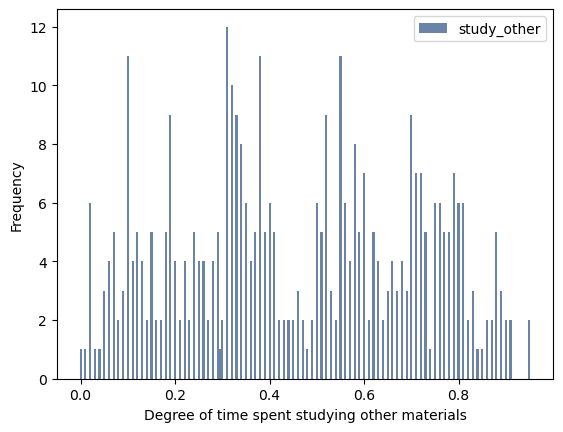

<Figure size 800x600 with 0 Axes>

In [49]:
hist = thinkstats2.Hist(df1.study_other, label = 'study_other')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Degree of time spent studying other materials', ylabel = 'Frequency')

In this distribution, we have a really solid spread of data points here. Specifically, we seem to have a binomial distribution, but we have no visible outliers. 

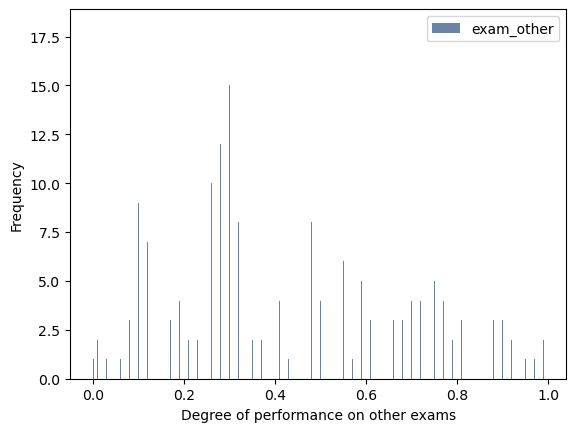

<Figure size 800x600 with 0 Axes>

In [50]:
hist = thinkstats2.Hist(df1.exam_other, label = 'exam_other')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Degree of performance on other exams', ylabel = 'Frequency')

We have a roughly normal distribution here as well, with no visible outliers. 

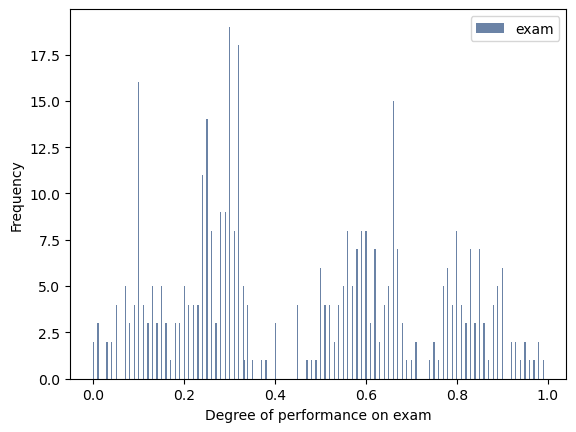

<Figure size 800x600 with 0 Axes>

In [51]:
hist = thinkstats2.Hist(df1.exam, label = 'exam')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Degree of performance on exam', ylabel = 'Frequency')

In terms of performance, we have a roughly binomial distribution here as well. We can see most students did either really well, roughly 60%, or failed badly. 

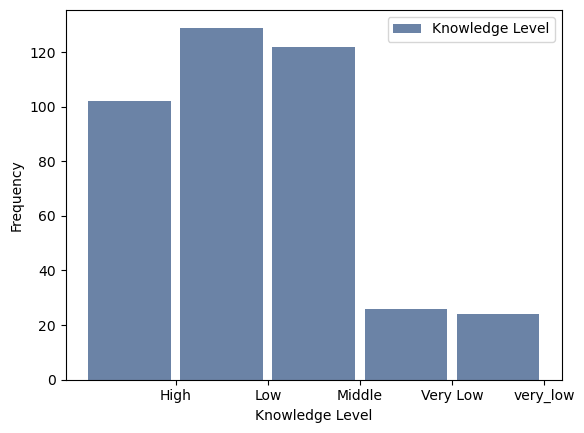

<Figure size 800x600 with 0 Axes>

In [59]:
hist = thinkstats2.Hist(df1.knowledge_lvl, label = 'Knowledge Level')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Knowledge Level', ylabel = 'Frequency')

We can see that the knowledge level has a normal distribution, with most students having low knowledge, the other half being middle/high. This is pretty consistent with our exam scores as well.

Next, let's take a look at the mean, mode, spread, and tails of these variables. We will specifically be looking at these three variables. 

In [63]:
print('Study mean: ', df1.study.mean())
print('Repetition mean: ', df1.repitition.mean())
print('Exam performance mean: ', df1.exam.mean())
print('Studying other materials mean: ', df1.study_other.mean())
print('Performance on other exams mean: ', df1.exam_other.mean())
print('Knowledge level mean: ', df1.study.mean())

Study mean:  0.35314143920595525
Repetition mean:  0.3559404466501241
Exam performance mean:  0.45635980148883376
Studying other materials mean:  0.45765508684863526
Performance on other exams mean:  0.43134243176178666
Knowledge level mean:  0.35314143920595525


We can see that most of these scores are way below average. We can investigate the implications of this by taking a look at the mode to see if it's outliers messing up the data, or if it's just how the spread is.

In [67]:
print('Study mode\n: ', df1.study.mode())
print('\nRepetition mode\n', df1.repitition.mode())
print('\nExam performance mode\n', df1.exam.mode())
print('\nStudying other materials mode\n', df1.study_other.mode())
print('\nPerformance on other exams mode\n', df1.exam_other.mode())
print('\nKnowledge level mode\n', df1.study.mode())

Study mode
:  0    0.10
1    0.18
2    0.20
Name: study, dtype: float64

Repetition mode
 0    0.28
1    0.29
Name: repitition, dtype: float64

Exam performance mode
 0    0.3
Name: exam, dtype: float64

Studying other materials mode
 0    0.31
Name: study_other, dtype: float64

Performance on other exams mode
 0    0.29
Name: exam_other, dtype: float64

Knowledge level mode
 0    0.10
1    0.18
2    0.20
Name: study, dtype: float64


This seems pretty consistent with our values from the mean. We can safely say there are no outliers skewing our results. Let's continue on and find the spread of our values, also known as the variance.

In [68]:
print('Study var: ', df1.study.var())
print('Repetition var: ', df1.repitition.var())
print('Exam performance var: ', df1.exam.var())
print('Studying other materials var: ', df1.study_other.var())
print('Performance on other exams var: ', df1.exam_other.var())
print('Knowledge level var: ', df1.study.var())

Study var:  0.044951479945187243
Repetition var:  0.04645345415601887
Exam performance var:  0.07116912643976141
Studying other materials var:  0.06085275884843763
Performance on other exams var:  0.06632938991148478
Knowledge level var:  0.044951479945187243


These values are all decently low, which means we should expect our means to deviate by each of these values to their corresponding variables

In [72]:
print(df1.study.describe(percentiles=[0.05, 0.95]))
print(df1.repitition.describe(percentiles=[0.05, 0.95]))
print(df1.exam.describe(percentiles=[0.05, 0.95]))
print(df1.study_other.describe(percentiles=[0.05, 0.95]))
print(df1.exam_other.describe(percentiles=[0.05, 0.95]))
print(df1.knowledge_lvl.describe(percentiles=[0.05, 0.95]))

count    403.000000
mean       0.353141
std        0.212018
min        0.000000
5%         0.080000
50%        0.300000
95%        0.779000
max        0.990000
Name: study, dtype: float64
count    403.000000
mean       0.355940
std        0.215531
min        0.000000
5%         0.060000
50%        0.300000
95%        0.780000
max        0.900000
Name: repitition, dtype: float64
count    403.000000
mean       0.456360
std        0.266775
min        0.000000
5%         0.081000
50%        0.400000
95%        0.890000
max        0.990000
Name: exam, dtype: float64
count    403.000000
mean       0.457655
std        0.246684
min        0.000000
5%         0.070000
50%        0.440000
95%        0.830000
max        0.950000
Name: study_other, dtype: float64
count    403.000000
mean       0.431342
std        0.257545
min        0.000000
5%         0.090000
50%        0.330000
95%        0.880000
max        0.990000
Name: exam_other, dtype: float64
count     403
unique      5
top       Low
fre

The tails are as follow:
* Study: (.08, .779)
* Repetition: (.081, .89)
* Exam: (.07, .83)
* Studying for other exams: (.07, .83)
* Performance on other exams: (.09, .88)
* Knowledge: no tails really exist for this variable

Next, we will compare students' performance on exams with how much time they spent studying. 

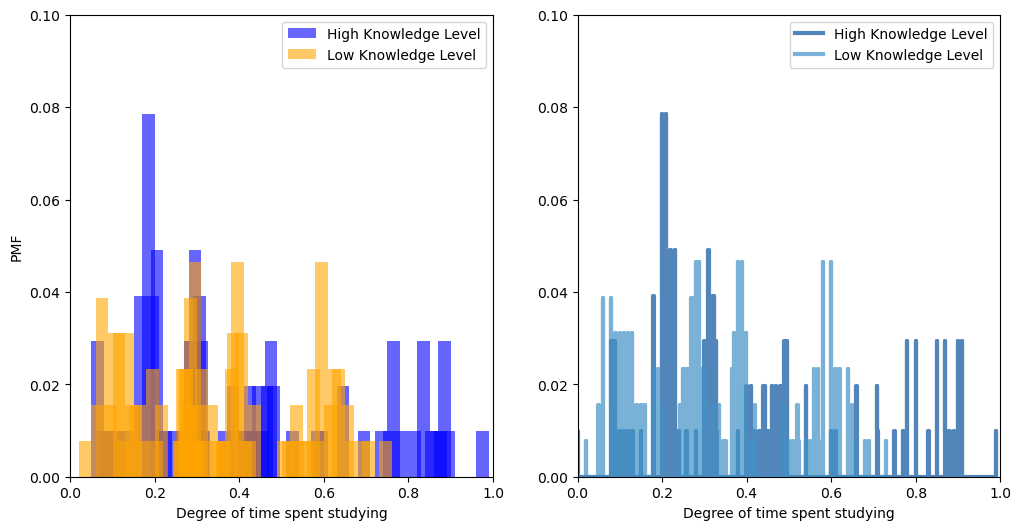

In [93]:
# first let's create subsets based on knowledge_lvl column
high_knowledge_df = df1[df1['knowledge_lvl'] == 'High']
low_knowledge_df = df1[df1['knowledge_lvl'] == 'Low']

# now we can create the pmf functions
high_pmf = thinkstats2.Pmf(high_knowledge_df.study, label="High Knowledge Level")
low_pmf = thinkstats2.Pmf(low_knowledge_df.study, label="Low Knowledge Level")

width = 0.03
axis = [0, 1, 0, .1]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(high_pmf, align="right", width=width, color = 'blue')
thinkplot.Hist(low_pmf, align="left", width=width, color = 'orange')
thinkplot.Config(xlabel="Degree of time spent studying", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([high_pmf, low_pmf])
thinkplot.Config(xlabel="Degree of time spent studying", axis=axis)

We can see that most people with a lower knowledge level would study to a degree from nothing to the higher end of 0.8, or in the 80th percentile of the class in terms of study time. However, it's interesting to see that a majority of those with a high knowledge level spent little time studying, an average amount time studying, or the most time spent studying. 

Next we can take a look at creating a CDF for the study time, and plotting it to see what we find.

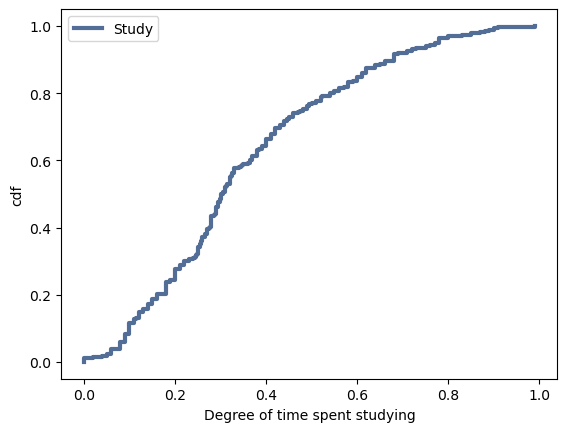

<Figure size 800x600 with 0 Axes>

In [94]:
cdf = thinkstats2.Cdf(df1.study, label = "Study")

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Degree of time spent studying', ylabel = 'cdf')

Our cdf here almost appears linear, meaning most of our values are normally distributed, with more values coming in at 0.3, as that is where our curve is the steepest. This tells us that most students spend a variable amount of time studying. Let's compare this with a cdf of the exam performance.

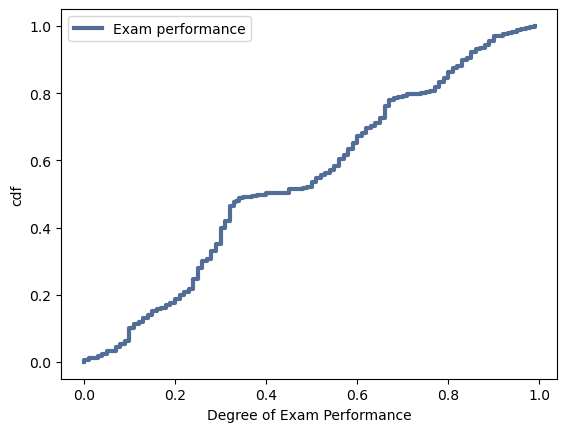

<Figure size 800x600 with 0 Axes>

In [95]:
cdf_2 = thinkstats2.Cdf(df1.exam, label = "Exam performance")

thinkplot.Cdf(cdf_2)
thinkplot.Show(xlabel='Degree of Exam Performance', ylabel = 'cdf')

This pmf coincides with the study time pretty well, and it shows that our performance is very linear with values very normally distributed, since our line is roughly straight, other than a few bumps at 0.4 and 0.8. 

Next, let's plot an analytical distribution, specifically an exponential distribution, of the study times.

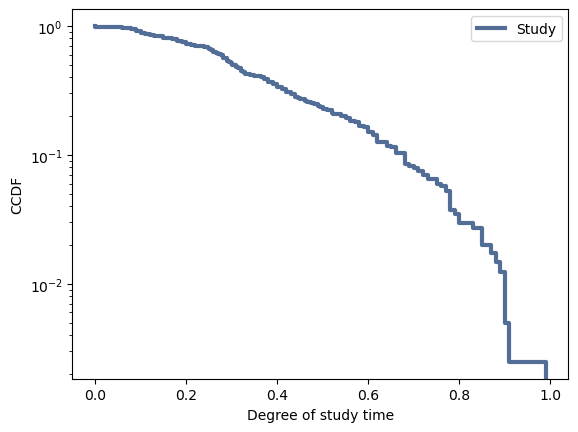

<Figure size 800x600 with 0 Axes>

In [96]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Degree of study time',
              ylabel = 'CCDF',
              yscale = 'log')

It's not exactly straight, which indicates that an exponential distribution is not a perfect model for this data. It indicates that our underlying assumption -- more time spent studying equates to better exam performance -- isn't necessarily true, but it is still reasonable to model this dataset with an exponential distribution. 

Next, let's create a scatter plot for study time and exam performance, and exam performance for this class and exam performance for the other materials. 

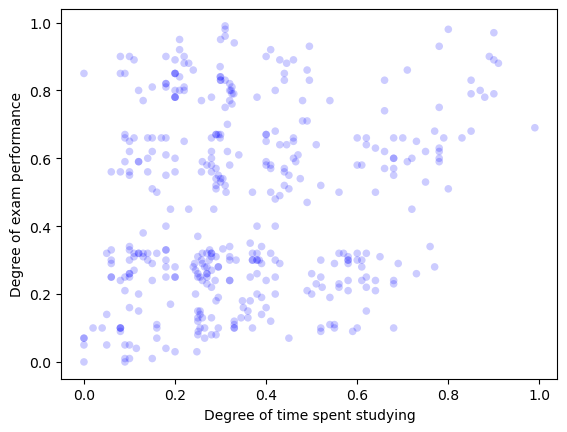

<Figure size 800x600 with 0 Axes>

In [97]:
thinkplot.Scatter(df1.study, df1.exam)
thinkplot.Show(xlabel='Degree of time spent studying',
              ylabel='Degree of exam performance')

Shockingly, there is no real correlation to be seen here. Let's now compare our two exam performances

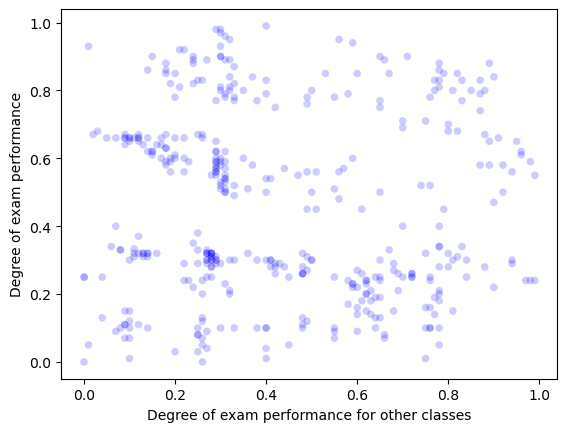

<Figure size 800x600 with 0 Axes>

In [98]:
thinkplot.Scatter(df1.exam_other, df1.exam)
thinkplot.Show(xlabel='Degree of exam performance for other classes',
              ylabel='Degree of exam performance')

We can see there are some clusters, but not much of a correlation. Let's take a look at the different statistical characteristics, such as covariance, Pearson’s correlation, and non-linear relationships.

First let's take a look at the covariance.

In [100]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

print('The covariance of study time and exam performance: ', Cov(df1.study, df1.exam))
print('The covariance of the two exam performances: ', Cov(df1.exam, df1.exam_other))

The covariance of study time and exam performance:  0.01120680767075716
The covariance of the two exam performances:  -0.0026923093116760772


As we have a positive covariance for study time and exam performance, this indicates as more time is spent studying, the better the exam performance will be. Interestingly though, as we have a (albeit very small) negative covariance for the two exam performance, this indicates that as students do better on one exam, they do worse on the other.

Next, let's take a look at the Pearson's coefficient correlation.

In [102]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print('The correlation of study time and exam performance: ', Corr(df1.study, df1.exam))
print('The correlation of the two exam performances: ', Corr(df1.exam, df1.exam_other))

The correlation of study time and exam performance:  0.1986292015696653
The correlation of the two exam performances:  -0.03928304345341544


There's about a 20% correlation between study time and performance, further confirming that as students spend more time studying, their performance will go up. The same applies to the two exam performances -- as students do better on one exam, their grades will be slightly lower on the other exam.

Now in the case that there are non-linear relationships, we can compare these values to Spearman's correlation to see if there is much difference.

In [103]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

print('The Spearman correlation of study time and exam performance: ', SpearmanCorr(df1.study, df1.exam))
print('The Spearman correlation of the two exam performances: ', SpearmanCorr(df1.exam, df1.exam_other))

The Spearman correlation of study time and exam performance:  0.1718850201850126
The Spearman correlation of the two exam performances:  -0.053452971830440385


As these values are slightly different, this indicates that these relationships are not perfectly linear. However, since the difference was small, we can say it still generally follows a similar trend. In both cases, the Spearman correlation might be slightly lower because it considers monotonic relationships in addition to linear ones.

Next, let's conduct a test on our hypothesis. We will be conducting a difference in means test, specifically for studying time for this class and studying for other classes. 

In [105]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = df1.study, df1.study_other
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(pvalue)

0.0


We see with our p-value of 0, this indicates statistic significance, indicating our hypothesis that these two have a low difference in means holds true.

Next, we will conduct regression analysis using our two explanatory variables, exam_other and study to determine what exam will be. 

In [110]:
import statsmodels.formula.api as smf

formula = 'exam ~ study + knowledge_lvl'
model = smf.ols(formula, data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     476.5
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          2.87e-165
Time:                        17:45:25   Log-Likelihood:                 353.31
No. Observations:                 403   AIC:                            -694.6
Df Residuals:                     397   BIC:                            -670.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7983      0.014     56.356      0.000       0.770       0.826
knowledge_lvl[T.Low]         -0.5459      0.014    -40.183      0.000      -0.573      -0.519
knowledge_lvl[T.Middle]      -0.2683      0.014    -19.677      0.000      -0.295      -0.241
knowledge_lvl[T.Very Low]    -0.6987      0.023    -30.678      0.000      -0.743      -0.654
knowledge_lvl[T.very_low]    -0.7086      0.023    -30.608      0.000      -0.754      -0.663
study                         0.0038      0.025      0.153      0.879      -0.044       0.052
==============================================================================
Omnibus:                       52.931   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.988
Skew:                          -0.922   Prob(JB):                     2.33e-16
Kurtosis:                       3.942   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that knowledge level and study time make up for 85% of the variability of a student's exam score according to the R-squared statistic. Our p-values are also all low, except for study time which is incredibly high. Thus, for we can say knowledge level is very statistically significant, whereas study time is not as significant. 